In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn import model_selection

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


plt.rcParams['axes.facecolor'] = 'white'

In [2]:
pokemons = pd.read_csv("Pokemon1.csv")
print(len(pokemons))

705


In [3]:
pokemons = pokemons.drop(['#'], 1)

In [4]:
pokemons.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Height,Weight,Base Experience
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,7,69,64
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,10,130,142
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,20,1000,236
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,6,85,62
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,11,190,142


In [68]:
pokemons[['Type 1']].drop_duplicates()


,Type 1
0,Grass
3,Fire
6,Water
9,Bug
15,Normal
22,Poison
24,Electric
26,Ground
34,Fairy
55,Fighting


In [5]:
x = 'Weight'
y = 'Height'
n = 40

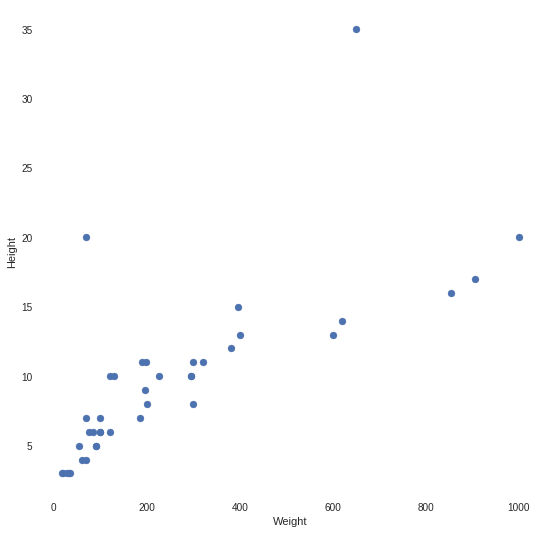

In [6]:
plt.figure(figsize=(9,9))
plt.scatter(x=x, y=y, data=pokemons.head(n))
plt.xlabel(x)
plt.ylabel(y)

In [7]:
from sklearn import preprocessing

scaled = pokemons.copy()
# pokemons[['Weight']] = preprocessing.scale(pokemons[['Weight']])
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit_transform(scaled[[x]])
scaled[[x]] = min_max_scaler.transform(scaled[[x]])
scaled[[y]] = min_max_scaler.transform(scaled[[y]])

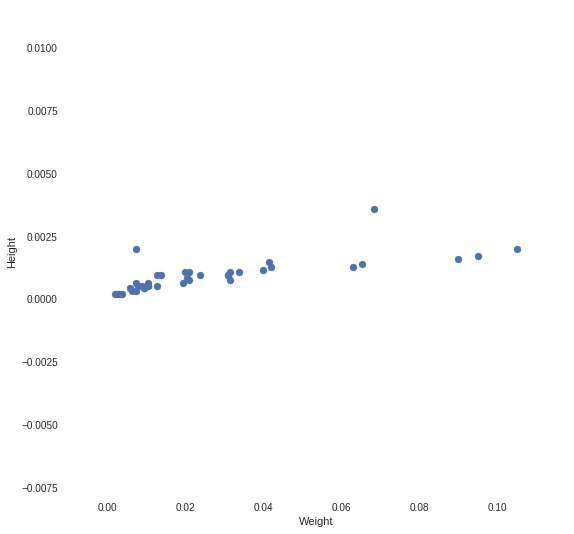

In [8]:
plt.figure(figsize=(9,9))
plt.scatter(x=x, y=y, data=scaled.head(n))
plt.xlabel(x)
plt.ylabel(y)

In [50]:
df = pokemons.drop('Type 2', 1)
df['Type1Id'] = df['Type 1'].rank(method='dense').astype(int)
print(df.columns.unique())
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'Legendary', 'Height', 'Weight',
       'Base Experience', 'Type1Id']
pca_features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Type1Id']

df.head()
print(df.Generation.unique())


Index(['Name', 'Type 1', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Height', 'Weight',
       'Base Experience', 'Type1Id'],
      dtype='object')
[1 2 3 4 5 6]


In [51]:
# df = df[~df['Legendary']]
df_norm = df.copy()
df_norm[features] = StandardScaler().fit(df[features]).transform(df[features])

In [52]:
X_tsne = TSNE(learning_rate=500, n_components=2).fit_transform(df_norm[features])
X_pca = PCA(n_components=2).fit_transform(df_norm[pca_features])

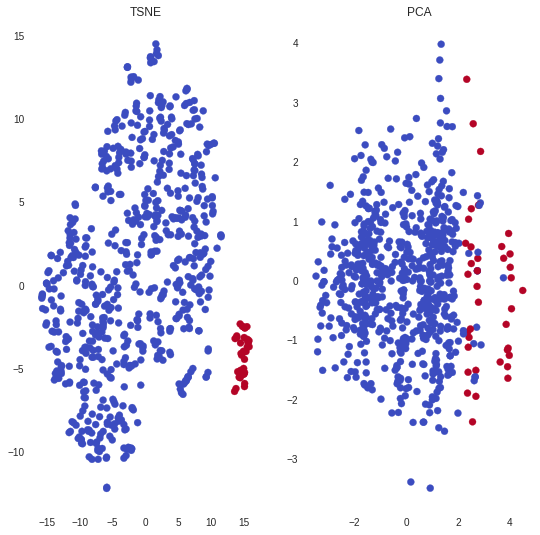

In [53]:
plt.figure(figsize=(9, 9))
cmap = plt.get_cmap('coolwarm')

plt.subplot(1,2,1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(df['Legendary'] * 1.))
plt.title('TSNE')
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(df['Legendary'] * 1.));
plt.title('PCA')

# ids = df[df.Legendary == True].index
# min_legend_pca = X_pca[ids, 0].min()
# print(np.where(X_pca[:,0] > min_legend_pca))
# indexes = np.where(X_pca[:,0] > min_legend_pca)[0]
# for i in indexes:
#     if pokemons.iloc[[i]].Legendary.bool() == False:
#         print(pokemons.iloc[[i]].Name)



In [54]:
num_clusters = 6

kmeans_tsne = KMeans(n_clusters=num_clusters).fit(X_tsne)
kmeans_pca = KMeans(n_clusters=num_clusters).fit(X_pca)

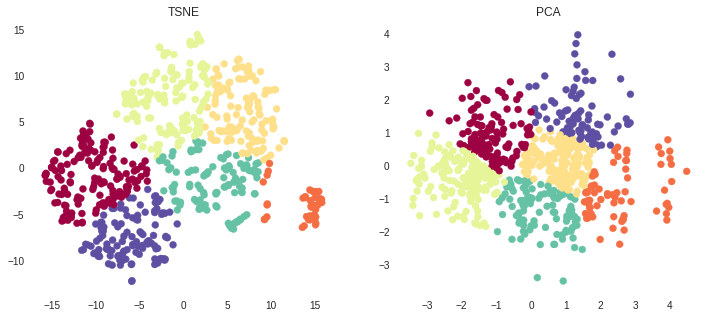

In [55]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_tsne.labels_, cmap=plt.cm.Spectral)
plt.title('TSNE')
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, cmap=plt.cm.Spectral)
plt.title('PCA')

In [57]:
# l_mean = df_norm.groupby(kmeans_tsne.labels_).get_group(3).Legendary.mean()
# df_norm.columns.unique()
df_norm.groupby(kmeans_pca.labels_).Type1Id.value_counts()

# 112 200 240
# print(pokemons.iloc[[112]].Name)
# print(pokemons.iloc[[200]].Name)
# print(pokemons.iloc[[240]].Name)

   Type1Id  
0   1.331838    35
    0.972914    17
    0.434527    16
   -0.103859    12
    0.793452    11
    0.613990     9
    0.075603     7
    1.152376     6
   -1.719018     3
   -0.821708     2
   -0.283321     2
    0.255065     2
   -1.001170     1
   -0.642245     1
1  -0.642245    14
   -1.360094    11
    0.793452     8
   -1.180632     5
    0.434527     5
   -1.001170     4
   -0.103859     4
    1.331838     4
   -1.539556     3
   -1.719018     2
    0.255065     2
    0.972914     2
    1.152376     2
   -0.821708     1
   -0.462783     1
   -0.283321     1
                ..
3  -1.360094     5
   -0.283321     5
    0.613990     5
   -0.462783     1
4  -1.719018    25
   -1.180632    17
   -0.642245    15
   -1.539556    11
    0.434527     9
   -0.103859     8
   -0.821708     5
   -0.283321     5
   -1.360094     4
    0.255065     3
    0.793452     3
    1.331838     2
   -1.001170     1
    0.075603     1
5   1.331838    30
    0.972914    15
    1.152376    12

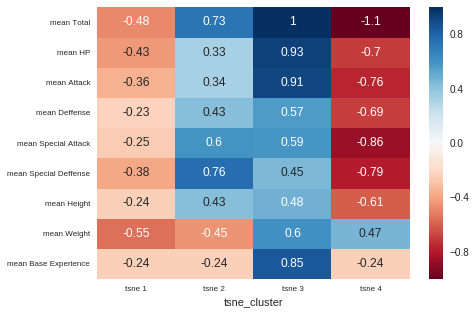

In [16]:
df_norm['tsne_cluster'] = kmeans_tsne.labels_
df_norm['pca_cluster'] = kmeans_pca.labels_
df_tsne_mean = df_norm.groupby('tsne_cluster').mean()
df_pca_mean = df_norm.groupby('pca_cluster').mean()

plt.figure(figsize=(7, 5))
ax = sns.heatmap(df_tsne_mean[features].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['tsne ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=8);
ax.set_yticklabels(['mean Total', 'mean HP', 'mean Attack', 'mean Deffense', 'mean Special Attack',
                    'mean Special Deffense', 'mean Height', 'mean Weight', 'mean Base Experience'][::-1], rotation=0, fontsize=8);

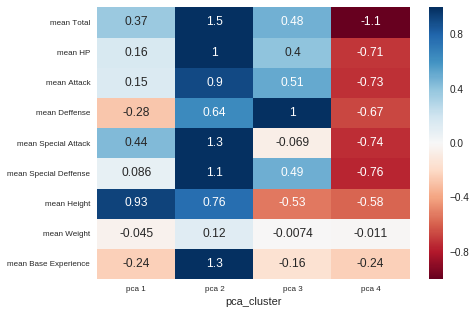

In [17]:
plt.figure(figsize=(7, 5))
ax = sns.heatmap(df_pca_mean[features].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['pca ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=8);
ax.set_yticklabels(['mean Total', 'mean HP', 'mean Attack', 'mean Deffense', 'mean Special Attack',
                    'mean Special Deffense',  'mean Height', 'mean Weight', 'mean Base Experience'][::-1], rotation=0, fontsize=8);


(-3.0076662684189586,
 173.00766626841897,
 -6.2578693483770733,
 241.25786934837703)

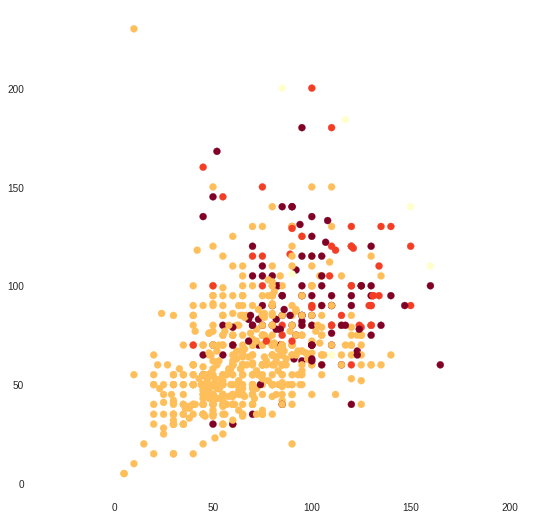

In [18]:
from sklearn.cluster import AgglomerativeClustering

X = pokemons[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
              'Legendary', 'Height', 'Weight', 'Base Experience']]
model = AgglomerativeClustering(n_clusters=4)

model.fit(X)
plt.figure(figsize=(9,9))
plt.scatter(X[['Attack']], X[['Defense']], c=model.labels_,
                        cmap=plt.cm.YlOrRd)
plt.axis('equal')

In [99]:
import pylab
from matplotlib.patches import Rectangle
import squarify

class Treemap:
    def __init__(self, tree, iter_method, size_method, color_method):
        """create a tree map from tree, using itermethod(node) to walk tree,
        size_method(node) to get object size and color_method(node) to get its
        color"""

        self.ax = pylab.subplot(111,aspect='equal')
        pylab.subplots_adjust(left=0, right=1, top=1, bottom=0)
        self.ax.set_xticks([])
        self.ax.set_yticks([])

        self.size_method = size_method
        self.iter_method = iter_method
        self.color_method = color_method
        self.addnode(tree)

    def addnode(self, node, lower=[0,0], upper=[1,1], axis=0):
        axis = axis % 2
        self.draw_rectangle(lower, upper, node)
        width = upper[axis] - lower[axis]
        try:
            for child in self.iter_method(node):
                upper[axis] = lower[axis] + (width * float(size(child))) / size(node)
                self.addnode(child, list(lower), list(upper), axis + 1)
                lower[axis] = upper[axis]

        except TypeError:
            pass

    def draw_rectangle(self, lower, upper, node):
        r = Rectangle( lower, upper[0]-lower[0], upper[1] - lower[1],
                   edgecolor='k',
                   facecolor= self.color_method(node))
        self.ax.add_patch(r)


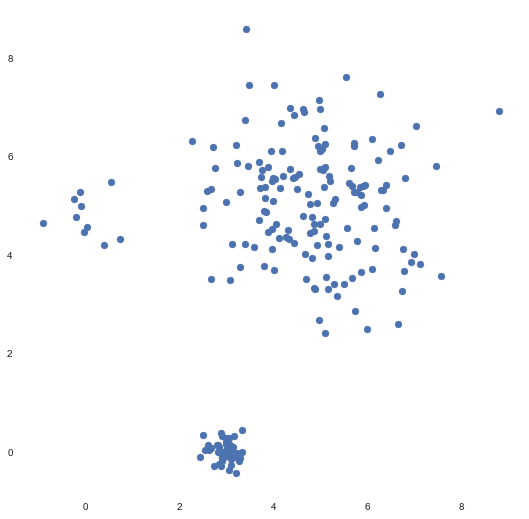

In [112]:
plt.figure(figsize=(9,9))
points = np.vstack(((np.random.randn(150, 2) *1.2  + np.array([5, 5])),
                  (np.random.randn(10, 2) *0.5 + np.array([0, 5])),
                  (np.random.randn(50, 2) * 0.25 + np.array([3, 0]))))
plt.scatter(points[:, 0], points[:, 1])


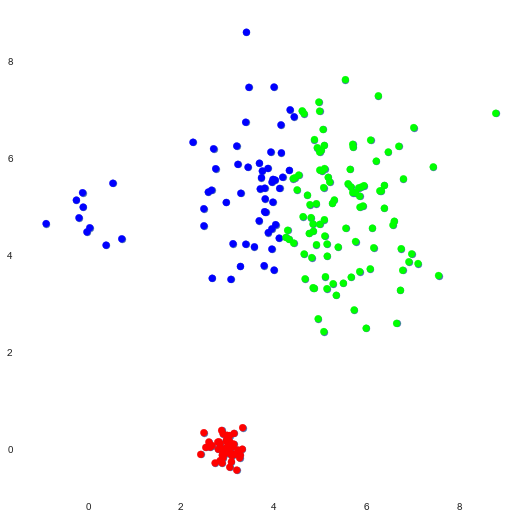

In [115]:
plt.figure(figsize=(9,9))

kmeans = KMeans(n_clusters=3).fit(points)
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(points[:, 0], points[:, 1], c=kmeans.labels_, cmap=plt.cm.brg)